<div style="text-align: center; background-color: #f2f2f2aa; padding: 10px; color: #111; border: 4px solid #333">
  <h1>SI 221-B</h1>
  <h3>Bases de l’Apprentissage</h3>
  <h3>TP "Décision Bayésienne"</h3>
  <h4>MARTINS BRAGA Arthur</h4>
</div>

## 1.Préliminaires

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.linalg import sqrtm 
from numpy.linalg import eig 
import pandas as pd
import scipy 

np.random.seed(123)

## 2. Génération d'une variable aléatoire gaussienne

 En  utilisant  la  fonction  randn,  générer  N  échantillons  d'une  variable  aléatoire 
gaussienne de moyenne 3 et de variance 4. Etudier l'évolution de la moyenne et de la 
variance empiriques en fonction de N.

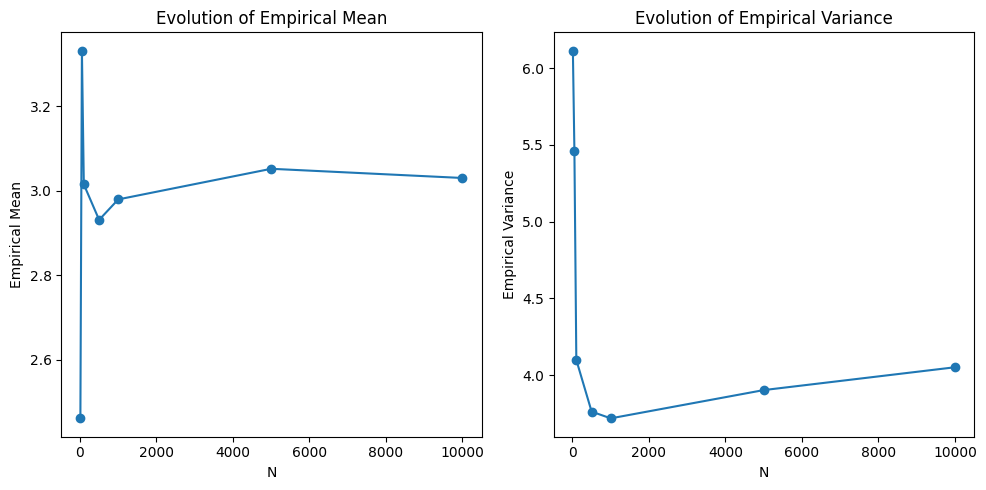

In [2]:
N_values = [10, 50, 100, 500, 1000, 5000, 10000]

empirical_means = []
empirical_variances = []

std_deviation = np.sqrt(4)
mean = 3

for N in N_values:
    samples = np.random.randn(N) * std_deviation + mean
    empirical_mean = np.mean(samples)
    empirical_variance = np.var(samples)
    empirical_means.append(empirical_mean)
    empirical_variances.append(empirical_variance)

# Plotting the evolution of empirical mean and variance
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(N_values, empirical_means, marker='o')
plt.xlabel('N')
plt.ylabel('Empirical Mean')
plt.title('Evolution of Empirical Mean')

plt.subplot(1, 2, 2)
plt.plot(N_values, empirical_variances, marker='o')
plt.xlabel('N')
plt.ylabel('Empirical Variance')
plt.title('Evolution of Empirical Variance')

plt.tight_layout()
plt.show()

## 3. Génération d'une variable aléatoire gaussienne

**3.1) Générer un échantillon de taille `N=100` d'un vecteur aléatoire gaussien défini par le vecteur  moyenne  ``m=[4  9]``  et  la  matrice  de  covariance  égale  à  l'identité.  Afficher  les échantillons.**

[[ 1.12568273 -0.10426311]
 [-0.10426311  0.81346186]]


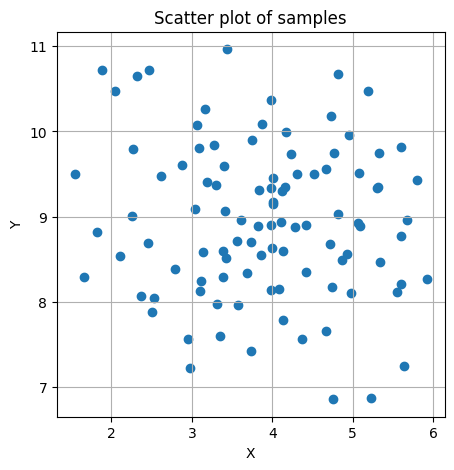

In [3]:
N = 100
mean = [4, 9]
cov = [[1, 0], [0, 1]]

# Generating N samples from the given distribution
samples = np.random.randn(2, N)
samples[0] = samples[0] * np.sqrt(cov[0][0]) + mean[0]
samples[1] = samples[1] * np.sqrt(cov[1][1]) + mean[1]

print(np.cov(samples))
# Plotting the samples
plt.figure(figsize=(5, 5))
plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of samples')
plt.grid(True)
plt.show()

Covariance matrix:
[[1.17 0.09]
 [0.09 1.24]]
Mean of samples:
[4.02 8.97]


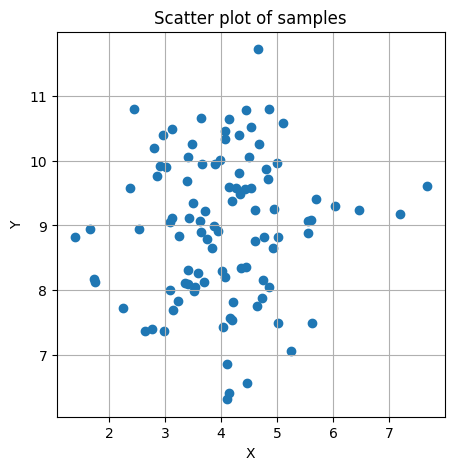

In [4]:
N = 100
mean = [4, 9]
cov = [[1, 0], [0, 1]]

# Generating N samples from the given distribution
samples = np.random.randn(2, N)
samples[0] = samples[0] * np.sqrt(cov[0][0]) + mean[0]
samples[1] = samples[1] * np.sqrt(cov[1][1]) + mean[1]

print("Covariance matrix:")
print(np.round(np.cov(samples), decimals=2))
print("Mean of samples:")
print(np.round(np.mean(samples, axis=1), decimals=2))

# Plotting the samples
plt.figure(figsize=(5, 5))
plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of samples')
plt.grid(True)
plt.show()

**3.2) Donner l'expression permettant de générer ``N=100`` échantillons d'un vecteur aléatoire de moyenne `m=[4 9]` et de matrice de covariance diagonale ``s= [1 0 ; 0 6]`` Vérifier votre résultat en utilisant les fonctions mean et cov  et afficher les échantillons.**

Covariance matrix:
[[ 1.   -0.22]
 [-0.22  5.68]]
Mean of samples:
[4.13 9.15]


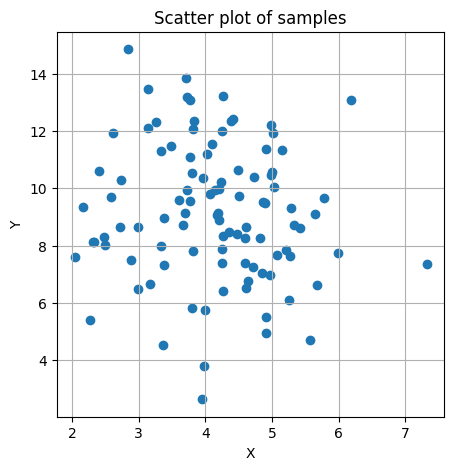

In [5]:
N = 100
mean = [4, 9]
cov = [[1, 0], [0, 6]]

# Generating N samples from the given distribution
samples = np.random.randn(2, N)
samples[0] = samples[0] * np.sqrt(cov[0][0]) + mean[0]
samples[1] = samples[1] * np.sqrt(cov[1][1]) + mean[1]

print("Covariance matrix:")
print(np.round(np.cov(samples), decimals=2))
print("Mean of samples:")
print(np.round(np.mean(samples, axis=1), decimals=2))

# Plotting the samples
plt.figure(figsize=(5, 5))
plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of samples')
plt.grid(True)
plt.show()

Les moyennes et les covariances imprimées sont très proches de celles attendues.

**3.3) Soit  $X$  un  vecteur  aléatoire  gaussien  centré  de  matrice  de  covariance  égale  à l'identité.  Chercher  une  transformation  linéaire  $X'=  U  X$  qui  permette  d'obtenir  un vecteur aléatoire centré de matrice de covariance $\Sigma$.**

La covariance de un vecteur aléatoire $Z$ est donnée par:

$cov(Z) = E[(Z - E(Z))(Z - E(Z))^T]$

Soit $X$ un vecteur aléatoire gaussien centré de matrice de covariance égale à l'identité. On a donc:

$E(X) = 0; \;$  $cov(X) = I;$

On cherche une transformation linéaire $X' = UX$ qui permette d'obtenir un vecteur aléatoire centré de matrice de covariance $\Sigma$.

$E(X') = E(U X) = U E(X) = U \cdot 0 = 0$

$cov(X') = E[(X' - E(X'))(X' - E(X))^T] = E[X'X'^T]$

$cov(X') = E[(UX)(UX)^T] = UE(XX^T)U^T = UIU^T = UU^T$ 

$\Sigma = UU^T$

En utilizant du Methode de Cholesky, on peut trouver une matrice $U$ qui satisfait cette condition:

$\Sigma = LL^T = UU^T \therefore  U = L $

Où $L$ est la matrice de Cholesky de $\Sigma$.

**3.4) Générer des échantillons dont la matrice de covariance est égale à s=$\begin{bmatrix}2 & 2\\ 2 & 5 \end{bmatrix}$**

 - Vérifier votre résultat avec les fonctions `mean` et `cov`.   
 - Calculer l'orientation de l'ellipsoide de Mahalanobis asscocié à $s$. 
 - Vérifier la relation liant $s$ à sa matrice diagonalisée $S_d:\: s=V.S_d.V^t$ avec $V$, matrice des vecteurs propres de $s$.

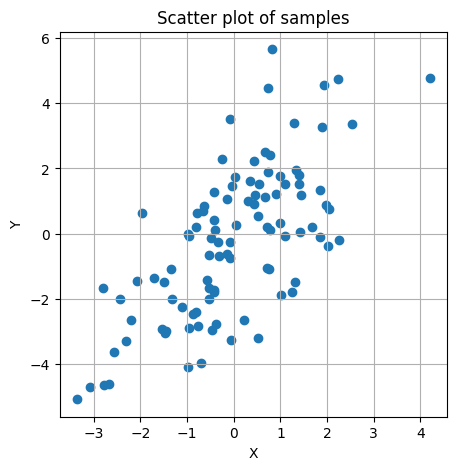

In [6]:
N = 100
mean = np.array([0, 0])
s = np.array([[2, 2], [2, 5]])

# Calculating the matrix L using Cholesky decomposition
L = np.linalg.cholesky(s)

# Generating N samples from the given distribution
normalSamples = np.random.randn(2, N)

samples = L @ normalSamples

# Plotting the samples
plt.figure(figsize=(5, 5))
plt.scatter(samples[0], samples[1])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of samples')
plt.grid(True)
plt.show()

In [7]:
print("Covariance matrix:")
print(np.round(np.cov(samples), decimals=2))
print("Mean of samples:")
print(np.round(np.mean(samples, axis=1), decimals=2))


Covariance matrix:
[[1.95 2.23]
 [2.23 5.39]]
Mean of samples:
[-0.02 -0.24]


L'orientation $\alpha$ est definie par: 
$$
tg(2\alpha) = \frac{2 \cdot s_{12}}{s_{11} - s_{22}}
$$



La matrice des vectors popres est definie par:
$$
V = \begin{bmatrix}cos(\alpha) & -sin(\alpha)\\ sin(\alpha)& cos(\alpha) \end{bmatrix}

$$

In [8]:
# Orientation
# tg(2a) = 2 * s[0, 1] / (s[0, 0] - s[1, 1])
alpha = 0.5 * np.arctan2(2 * s[0, 1], (s[0, 0] - s[1, 1]))
print("Orientation:")
print(alpha)
alpha = np.degrees(alpha)
# Matrice des Vectors propres
v = np.array([[np.cos(alpha), -np.sin(alpha)],
              [np.sin(alpha), np.cos(alpha)]])
print("Eigenvectors:")
print(v)

# Matrice diagonalisee
D = np.diag(eig(s)[0])

print(D)

# Calculating the matrix s using the eigenvectors
new_s = v.T @ D @ v

print("Calculated covariance matrix:")
print(new_s)
print("Original covariance matrix:")
print(s)

Orientation:
1.1071487177940904
Eigenvectors:
[[ 0.82358367 -0.5671948 ]
 [ 0.5671948   0.82358367]]
[[1. 0.]
 [0. 6.]]
Calculated covariance matrix:
[[2.60854969 2.33566186]
 [2.33566186 4.39145031]]
Original covariance matrix:
[[2 2]
 [2 5]]


**3.5) Générer dans les matrices xl, x2, x3, trois vecteurs aléatoires gaussiens en dimension 2 (100 échantillons par vecteur).**

On donne:

$m_1 = \begin{bmatrix}4 & 9 \end{bmatrix} \;\; s_1 = \begin{bmatrix}2 & 2 \\ 2 & 5 \end{bmatrix} $

$m_2=\begin{bmatrix}8.5 & 7.5 \end{bmatrix} \;\; s_2 = \begin{bmatrix}2 & 
-2 \\ -2 & 5 \end{bmatrix}$

$m_3=\begin{bmatrix}6 & 3.5 \end{bmatrix} \;\; s_3 = \begin{bmatrix}7 & -4 \\ -4 & 7 \end{bmatrix}$


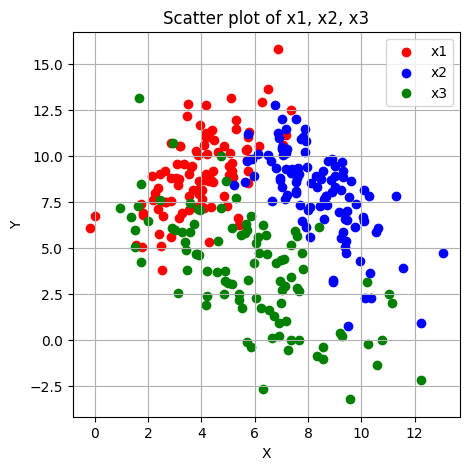

Covariance matrix (x1):
[[2.08 1.83]
 [1.83 4.51]]
Mean of samples(x1):
[3.96 9.01]
Covariance matrix (x2):
[[ 2.15 -2.3 ]
 [-2.3   5.71]]
Mean of samples(x2):
[8.36 7.99]
Covariance matrix (x3):
[[ 5.88 -4.66]
 [-4.66  8.9 ]]
Mean of samples(x3):
[5.78 3.83]


In [9]:
N = 100

n1 = np.random.randn(2, N)
m1 = np.array([4, 9])
s1 = np.array([[2, 2], [2, 5]])
x1 = np.linalg.cholesky(s1) @ n1 + m1[:, None]


n2 = np.random.randn(2, N)
m2 = np.array([8.5, 7.5])
s2 = np.array([[2, -2], [-2, 5]])
x2 = np.linalg.cholesky(s2) @ n2 + m2[:, None]

n3 = np.random.randn(2, N)
m3 = np.array([6, 3.5])
s3 = np.array([[7, -4], [-4, 7]])
x3 = np.linalg.cholesky(s3) @ n3 + m3[:, None]


plt.figure(figsize=(5, 5))
plt.scatter(x1[0], x1[1], c='red', label='x1')
plt.scatter(x2[0], x2[1], c='blue', label='x2')
plt.scatter(x3[0], x3[1], c='green', label='x3')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter plot of x1, x2, x3')
plt.legend()
plt.grid(True)
plt.show()


print("Covariance matrix (x1):")
print(np.round(np.cov(x1), decimals=2))
print("Mean of samples(x1):")
print(np.round(np.mean(x1, axis=1), decimals=2))

print("Covariance matrix (x2):")
print(np.round(np.cov(x2), decimals=2))
print("Mean of samples(x2):")
print(np.round(np.mean(x2, axis=1), decimals=2))

print("Covariance matrix (x3):")
print(np.round(np.cov(x3), decimals=2))
print("Mean of samples(x3):")
print(np.round(np.mean(x3, axis=1), decimals=2))


## 4. Génération d'une variable aléatoire gaussienne

**4.1) Ouvrir une autre fenêtre. Créer une grille de points X(i), Y(j) répaftis réguliêrement dans I'espace de taille 57x57 entre les valeurs 0.27 et 12.5 pour Ia premiére mesure et -2 et 15 pour la deuxiême mesure (Utiliser la fonction linspace).**

In [10]:
GRID_SIZE = 57

x = np.linspace(0.27, 12.5, GRID_SIZE)
y = np.linspace(-2, 15, GRID_SIZE)

**4.2) Pour la classe 1 de la question 3.5, construire la matrice $\text{dens1}(i,j)$ contenant la densité de probabilité conditionnelle en chaque point $(X(i), Y(j))$ de la grille.**

In [13]:
dens1 = np.zeros((GRID_SIZE, GRID_SIZE))

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        dens1[i, j] = scipy.stats.multivariate_normal.pdf(
            [x[i], y[j]], mean=m1, cov=s1)

**4.3) Afficher les courbes d'équidensités pour la classe 1 à l'aide de la fonction contour. Quelle est la forme de ces courbes ?**

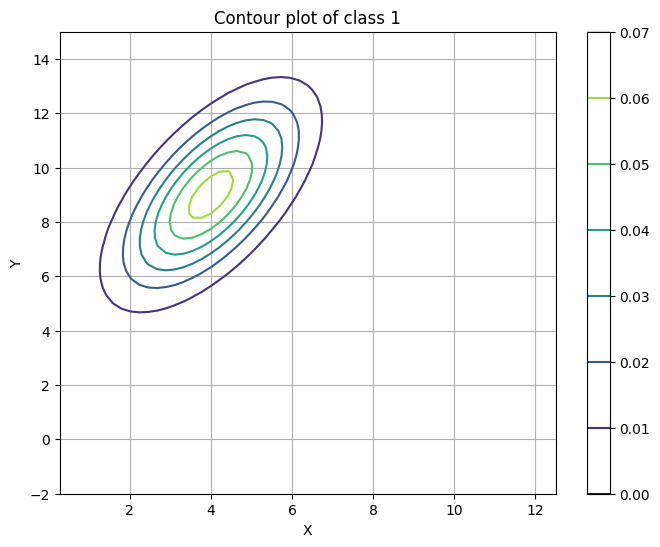

In [17]:
plt.figure(figsize=(8, 6))
contour = plt.contour(x, y, dens1.T)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Contour plot of class 1')
plt.grid(True)
plt.colorbar(contour)
plt.show()


**4.4) Faire de même pour les deux autres classes. Représenter en 3-D sur la même figure les trois lois de densités conditionnelles (utiliser la fonction mesh). Expliquer l'allure des amplitudes maximales des lois de densités.**

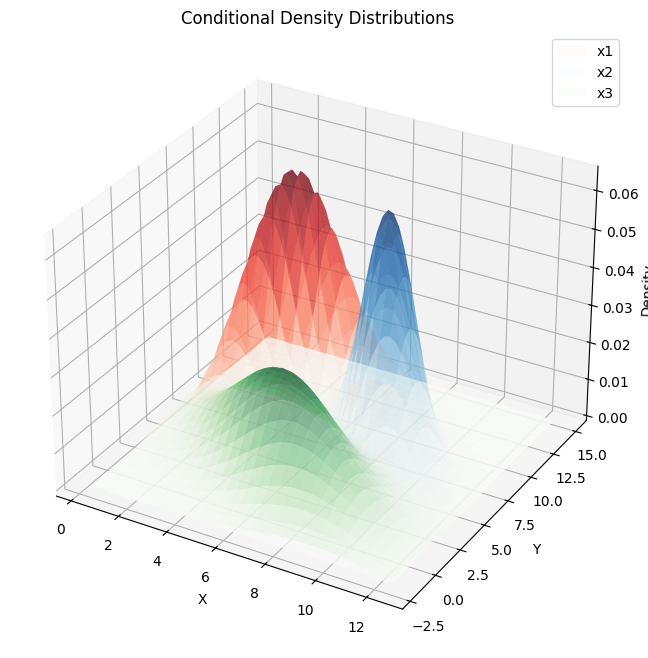

In [22]:
X, Y = np.meshgrid(x, y)

dens1 = scipy.stats.multivariate_normal.pdf(np.dstack((X, Y)), mean=m1, cov=s1)
dens2 = scipy.stats.multivariate_normal.pdf(np.dstack((X, Y)), mean=m2, cov=s2)
dens3 = scipy.stats.multivariate_normal.pdf(np.dstack((X, Y)), mean=m3, cov=s3)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, dens1, cmap='Reds', alpha=0.5, label='x1')
ax.plot_surface(X, Y, dens2, cmap='Blues', alpha=0.5, label='x2')
ax.plot_surface(X, Y, dens3, cmap='Greens', alpha=0.5, label='x3')

ax.legend()

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Density')
ax.set_title('Conditional Density Distributions')

plt.show()


Dans le cas d'une distribution normale bivariée, les amplitudes maximales des lois de densités dépendent de facteurs tels que la moyenne, la variance et la covariance. Les densités de probabilité sont souvent représentées par des ellipses concentriques, où les amplitudes maximales se trouvent généralement au centre et diminuent à mesure que l'on s'éloigne. Si la covariance est nulle (les variables x et y sont indépendantes), les ellipses seront alignées avec les axes x et y, et les amplitudes maximales seront situées sur ces axes. En revanche, si la covariance n'est pas nulle, les ellipses seront inclinées par rapport aux axes x et y, et les amplitudes maximales ne suivront pas strictement ces axes, mais plutôt la direction de la covariance.

## 5. Visualisation des frontrières

**5.1) Classer les points (X(i), Y(i)) de la grille précédente. On utilisera une matrice Z(i,j) dont les éléments contiendront l'étiquette (1, 2 ou 3) de la classe obtenue pour chacun des éléments de la grille.**

In [133]:
Z = np.zeros((GRID_SIZE, GRID_SIZE))

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        densities = [dens1[i, j], dens2[i, j], dens3[i, j]]
        Z[i, j] = np.argmax(densities) + 1

**5.2) Pour faire apparaitre les frontiêres entre classes, appliquer Ia fonction contour à la transposée de Z et aux vecteurs X et Y. Indiquez les régions de I'espace correspondant à chacune des classes ? On pourra superposer les frontiêres aux points échantillons.**

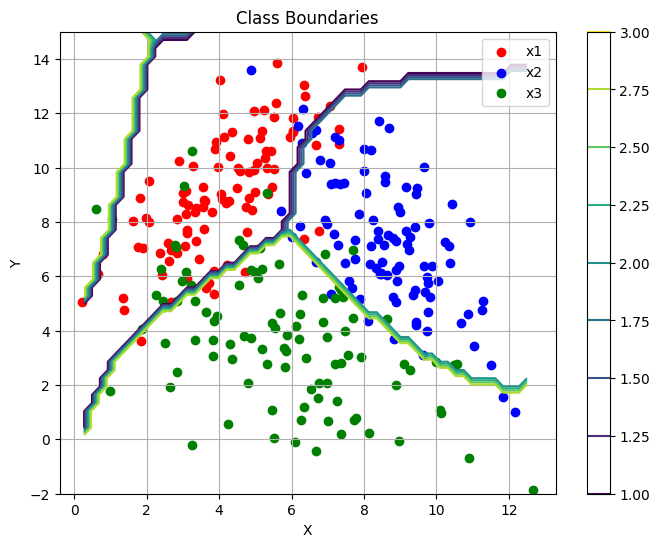

In [139]:
plt.figure(figsize=(8, 6))
contour = plt.contour(X, Y, Z)
plt.scatter(x1[0], x1[1], c='red', label='x1')
plt.scatter(x2[0], x2[1], c='blue', label='x2')
plt.scatter(x3[0], x3[1], c='green', label='x3')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Class Boundaries')
plt.legend()
plt.grid(True)
plt.colorbar(contour)
plt.show()


## 6. Application

Cette  application  est  issue  du  Cars  dataset  (collecté  par  E.  Ramos  et  D.  Donoho  et entreposé dans la bibliothèque StatLib). Cet ensemble contient environ 400 échantillons représentant des modèles de voitures et 8 variables les décrivent. La dernière variable est la classe des échantillons, c-a-d le continent d’origine du modèle : USA (1), Europe 
(2), Asie (3).  Les modèles voitures ne sont pas équirépartis suivant les continents.  
 
On veut prédire la classe du modèle (le continent d’origine) à partir de deux variables :  
 
- **MPG :** miles per gallon relatif à la consommation du véhicule (en position 1) 
- **weight :** le poids de la voiture (en position 5) 
 
 

In [147]:
df = pd.read_csv('voitures_t.txt', header=None)
df = df[[0, 4, 7]]
df.columns = ['MPG', 'weight', 'classification']
df.head() 

,MPG,weight,classification
0,18.0,3504,1
1,15.0,3693,1
2,18.0,3436,1
3,16.0,3433,1
4,17.0,3449,1


**Déterminer  le  vecteur  moyenne  et  la  matrice  de  covariance  de  chacune  des  classes.**

In [163]:
class1_df = df[df['classification'] == 1]
class2_df = df[df['classification'] == 2]
class3_df = df[df['classification'] == 3]

class1_m = np.mean(class1_df[["MPG", "weight"]], axis=0)
class1_s = np.cov(class1_df[["MPG", "weight"]], rowvar=False)

class2_m = np.mean(class2_df[["MPG", "weight"]], axis=0)
class2_s = np.cov(class2_df[["MPG", "weight"]], rowvar=False)

class3_m = np.mean(class3_df[["MPG", "weight"]], axis=0)
class3_s = np.cov(class3_df[["MPG", "weight"]], rowvar=False)

print("Class 1:")
print("Mean:")
print(np.round(class1_m, decimals=2))
print("Covariance:")
print(np.round(class1_s, decimals=2))

print("Class 2:")
print("Mean:")
print(np.round(class2_m, decimals=2))
print("Covariance:")
print(np.round(class2_s, decimals=2))

print("Class 3:")
print("Mean:")
print(np.round(class3_m, decimals=2))
print("Covariance:")
print(np.round(class3_s, decimals=2)) 

Class 1:
Mean:
MPG         20.03
weight    3372.49
dtype: float64
Covariance:
[[ 4.148e+01 -4.336e+03]
 [-4.336e+03  6.326e+05]]
Class 2:
Mean:
MPG         27.60
weight    2433.47
dtype: float64
Covariance:
[[ 4.330e+01 -1.657e+03]
 [-1.657e+03  2.419e+05]]
Class 3:
Mean:
MPG         30.45
weight    2221.23
dtype: float64
Covariance:
[[ 3.709e+01 -1.101e+03]
 [-1.101e+03  1.027e+05]]


**Tracer  les  frontières  entre  classes  à  partir  des  échantillons  fournis  dans  le  fichier voitures.mat  (load voitures renvoie dans la variable cars l’ensemble des échantillons).**

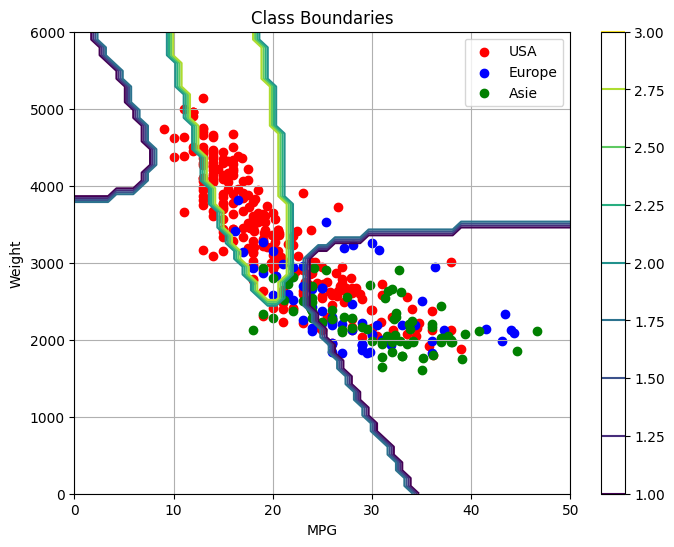

In [154]:
GRID_SIZE = 60

x = np.linspace(0, 50, GRID_SIZE)
y = np.linspace(0, 6000, GRID_SIZE)

dens1 = np.zeros((GRID_SIZE, GRID_SIZE))
dens2 = np.zeros((GRID_SIZE, GRID_SIZE))
dens3 = np.zeros((GRID_SIZE, GRID_SIZE))

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        dens1[i, j] = scipy.stats.multivariate_normal.pdf(
            [x[i], y[j]], mean=class1_m, cov=class1_s)
        dens2[i, j] = scipy.stats.multivariate_normal.pdf(
            [x[i], y[j]], mean=class2_m, cov=class2_s)
        dens3[i, j] = scipy.stats.multivariate_normal.pdf(
            [x[i], y[j]], mean=class3_m, cov=class3_s)
        
Z = np.zeros((GRID_SIZE, GRID_SIZE))

for i in range(GRID_SIZE):
    for j in range(GRID_SIZE):
        densities = [dens1[i, j], dens2[i, j], dens3[i, j]]
        Z[i, j] = np.argmax(densities) + 1

plt.figure(figsize=(8, 6))
contour = plt.contour(x, y, Z)
plt.scatter(class1_df['MPG'], class1_df['weight'], c='red', label='USA')
plt.scatter(class2_df['MPG'], class2_df['weight'], c='blue', label='Europe')
plt.scatter(class3_df['MPG'], class3_df['weight'], c='green', label='Asie')
plt.xlabel('MPG')
plt.ylabel('Weight')
plt.title('Class Boundaries')
plt.legend()
plt.grid(True)
plt.colorbar(contour)
plt.show()   
